# Polytop Library

This Jupyter notebook will demonstrate how to use the Polytop library to load sample ITP files, create monomer instances, and display a 2D representation of molecules.

## Importing the Library

We will import the `polytop` library and confirm the version.

In [1]:
# Load sample ITPs
import polytop
from polytop.topology import Topology
from polytop.junction import Junction
from polytop.monomer import Monomer 
from polytop import Polymer
from polytop.visualize import Visualize
from IPython.display import Image
from IPython.core.display import HTML

print(f"Polytop Version {polytop.__version__}")

Polytop Version 1.0


## Load topology from an ITP file

First, we will load the ITP files for some molecules to use as monomers.  We'll use some amino acids to make a polypeptide.  We'll start by importing `Arginine` using the `Topology.from_ITP()` function. This function will return a `Topology` object that contains all of the information from the ITP file.  Note for display purposes we'll add a double bond manually between the carbon and the second oxygen in the terminal carboxyl group.

In [2]:
ARG = Topology.from_ITP('tests/data/arginine.itp')

We can visualize the topology as a 2D structure to make sure that this is the molecule we want to use.

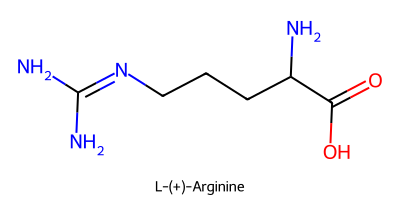

In [3]:
Visualize(ARG).draw2D('tests/output/ARG.png',(400,200))
Image(filename='tests/output/ARG.png') 

Now we need to select the terminal amine and the terminal carboxyl group as polymerization junction points in this topology so we can define this topology as a monomer.  First we redraw the topology with explicit hydrogens visible and atom IDs displayed.

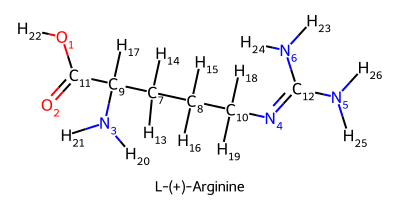

In [4]:
Visualize(ARG).draw2D('tests/output/ARG_unordered.png',(400,200),remove_explicit_H=False, show_atom_ID=True)
Image(filename='tests/output/ARG_unordered.png') 

The first step is to reorder the atom indicies to minimize the name space required for this mononmer (this is not strictly necessary, but it will make the atom IDs easier to read).  We can do this with the `Topology.reorder()` function.  This function will return a new `Topology` object with the atoms reordered.

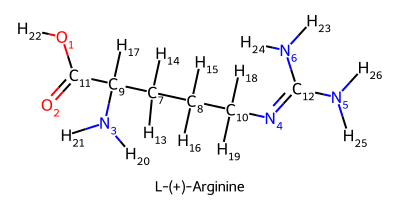

In [5]:
ARG.auto_rename_atoms()
Visualize(ARG).draw2D('tests/output/ARG_ordered.png',(400,200),remove_explicit_H=False, show_atom_ID=True)
Image(filename='tests/output/ARG_ordered.png')

Now we can select the atoms that will be on either side of the polymerization junction points, and give each junction a name.  And finally display the monomer highlighting the junctions.

In [6]:
ARG_N = ARG.junction('N1','H9').named('N')
ARG_C = ARG.junction('C5','O1').named('C')
ARG_monomer = Monomer(ARG, [ARG_N, ARG_C])
Visualize.monomer(ARG_monomer).draw2D('tests/output/ARG_monomer.png',(400,200),highlight_junctions=True)
Image(filename='tests/output/ARG_monomer.png')

AttributeError: 'NoneType' object has no attribute 'atom_name'

## Loading a glutamine topology

And we'll do the same with the second amino acid, glutamine

In [ ]:
GLN = Topology.from_ITP('tests/data/glutamine.itp')
Visualize(GLN).draw2D('tests/output/GLN.png',(400,200))
Visualize(GLN).draw2D('tests/output/GLN_unordered.png',(400,200),remove_explicit_H=False, show_atom_ID=True)
GLN.auto_rename_atoms()
Visualize(GLN).draw2D('tests/output/GLN_ordered.png',(400,200),remove_explicit_H=False, show_atom_ID=True)
GLN_N = GLN.junction('N1','H6').named('N')
GLN_C = GLN.junction('C4','O1').named('C')
GLN_monomer = Monomer(ARG, [ARG_N, ARG_C])
Visualize.monomer(GLN_monomer).draw2D('tests/output/GLN_monomer.png',(400,200),highlight_junctions=True)


GLN_pipeline = ['tests/output/GLN.png','tests/output/GLN_unordered.png','tests/output/GLN_ordered.png','tests/output/GLN_monomer.png']

html = '<h1>Glutamine pipeline</h1>'
html += '<div style="display:flex">'
for image in GLN_pipeline:
    html += f'<div style="display:inline-flex"><figure><img src="{image}" style="margin:0 10px" width="300"><figcaption>{image}</figcaption></figure></div>'
html += '</div>'

display(HTML(html))

# Construct a polymer from a set of monomers

 

In [ ]:
dipeptide = Polymer(ARG_monomer)
dipeptide.extend(GLN_monomer, from_junction_name = "C", to_junction_name = "N")
Visualize.polymer(dipeptide).draw2D('tests/output/dipeptide.png',(400,200))


# More complex polymers

We'll model a simple form of glycogen (skipping the glycogenin protein nucleating the **C** chain in the center of the polymer), which is a complex polymer of glucose molecules.  https://chem.libretexts.org/Bookshelves/Biological_Chemistry/Supplemental_Modules_(Biological_Chemistry)/Carbohydrates/Polysaccharides/Glycogen

The structure is characterized by chains 8-10 units long of glucose molecules linked by alpha-1,4-glycosidic bonds, with branches linked by alpha-1,6-glycosidic bonds.  There are three category of chains, **A**, **B**, and **C**, they are 8-10 monomers long, at the end of each chain is a glucose monomer with 3 branch points. There is one **C** chain at the center of the polymer.  For this simplification that **C** chain, will be branch to 2 **B** chains, and each **B** will branch to 4  **A** chains.

# Load monomer

Let's start with a simple molecule of glucose, and only one of the isomers (the cyclic form), but it would be possible to model others such as the open chain form as well, and to distribute randomly among multiple  given an experimentally derived distribution.  We'll create 2 different monomers, one with just the 1,4-glycosidic bond, and one with the the 1,4-glycosidic bond and a 1,6-glycosidic bond.

In [7]:
GLU = Topology.from_ITP('tests/data/glucose.itp')
Visualize(GLU).draw2D('tests/output/GLU.png',(400,200))
Visualize(GLU).draw2D('tests/output/GLU_unordered.png',(400,200),remove_explicit_H=False, show_atom_ID=True)
GLU.auto_rename_atoms()
Visualize(GLU).draw2D('tests/output/GLU_ordered.png',(400,200),remove_explicit_H=False, show_atom_ID=True)
GLU_1 = GLU.junction('C1','O3').named('1')
GLU_4 = GLU.junction('C4','HC3').named('4')
GLU_6 = GLU.junction('C6','HC11').named('6')

GLU_monomer = Monomer(GLU, [GLU_1, GLU_4, GLU_6])
Visualize.monomer(GLU_monomer).draw2D('tests/output/GLU_monomer.png',(400,200),highlight_junctions=True)


GLU_pipeline = ['tests/output/GLU.png','tests/output/GLU_unordered.png','tests/output/GLU_ordered.png','tests/output/GLU_monomer.png']

html = '<h1>Glucose pipeline</h1>'
html += '<div style="display:flex">'
for image in GLU_pipeline:
    html += f'<div style="display:inline-flex"><figure><img src="{image}" style="margin:0 10px" width="300"><figcaption>{image}</figcaption></figure></div>'
html += '</div>'

display(HTML(html))

# Make polymer chains

Glucose in glycogen 